In [70]:
import json
from datetime import datetime
from dateutil import parser
import pandas as pd
import calplot
import matplotlib.pyplot as plt

In [91]:
with open("aw-buckets-export.json", "r") as f:
    data = json.load(f)

In [98]:
app_usage = {}
dayrecord = {}
total_duration = 0.0

for event in data['buckets']['aw-watcher-window_pc']['events']:
#     date_str = datetime.strptime(event["timestamp"], "%Y-%m-%dT%H:%M:%S.%f+00:00").strftime("%Y-%m-%d")
#     date = datetime.strptime(date_str, "%Y-%m-%d")
    date = parser.parse(event["timestamp"]).strftime("%Y-%m-%d")
    duration = event['duration']
    appname = event['data']['app']
    total_duration += duration
    
    if "2021" in date:
        if appname in app_usage:
            app_usage[appname] = duration + app_usage[appname]
        else:
            app_usage[appname] = duration

        if date in dayrecord:
            dayrecord[date] += duration
        else:
            dayrecord[date] = duration

Total PC Usage:  10307056.109999962


In [100]:
hours = total_duration//3600
print("Total PC Usage in hours: ", hours)
print("Total PC Usage in days: ", hours//24)

Total PC Usage in hours:  2863.0
Total PC Usage in days:  119.0


In [93]:
app_usage_hourly = {}
for k,v in app_usage.items():
    usage_time = int(v//3600)
    if usage_time > 10:
        app_usage_hourly[k[:-4]] = usage_time

print(app_usage_hourly)

{'firefox': 993, 'Telegram': 226, 'Code - Insiders': 33, 'WindowsTerminal': 305, 'explorer': 30, 'EpicGamesLauncher': 26, 'RocketLeague': 299, 'steam': 12, 'Discord': 85, 'LockApp': 304, 'vlc': 29, 'chrome': 105, 'sublime_text': 31, 'Obsidian': 36, 'scrcpy': 13, 'ACValhalla': 97, 'destiny2': 11, 'vcxsrv': 32, 'ItTakesTwo_Trial': 12, 'NFS14': 13}


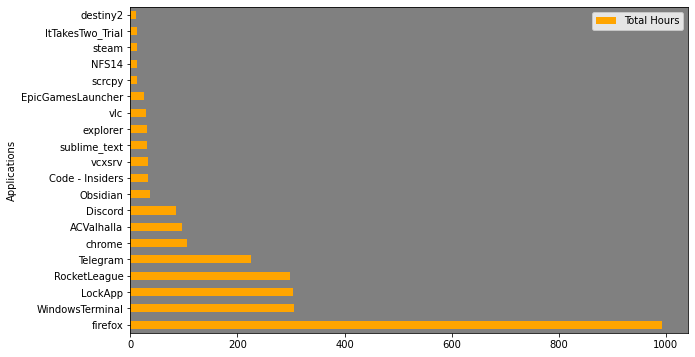

In [94]:
apps_sorted = dict(sorted(app_usage_hourly.items(), key=lambda item: item[1], reverse=True))
apps_df = pd.DataFrame(apps_sorted.items(), columns=["Applications", "Total Hours"])
P = apps_df.plot(kind="barh", x=0, y=1, figsize=(10,6), color="orange")
P.set_facecolor('gray')
plt.show()

(<Figure size 900x122.4 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

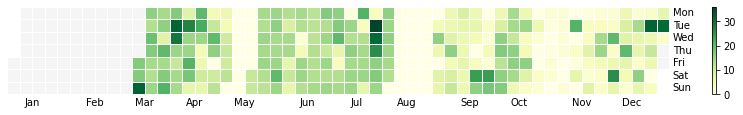

In [97]:
dataToPlot = {}

for k,v in dayrecord.items():
    date_ = datetime.strptime(k, "%Y-%m-%d")
    if date_.year == 2021:
        dataToPlot[date_] = int(v)//3600
series = pd.Series(dataToPlot)
calplot.calplot(series, cmap='YlGn', edgecolor=None, yearlabels=False)